In [1]:
!pip install torch torchvision matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.18MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.4MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.47MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Task: Neural Network Optimization
Best objective function: 0.1353072970364987
Found solution: {'learning_rate': 0.003452411800420677, 'hidden_size': 250, 'batch_size': 90}
Elapsed time: 1751.0030369758606 sec


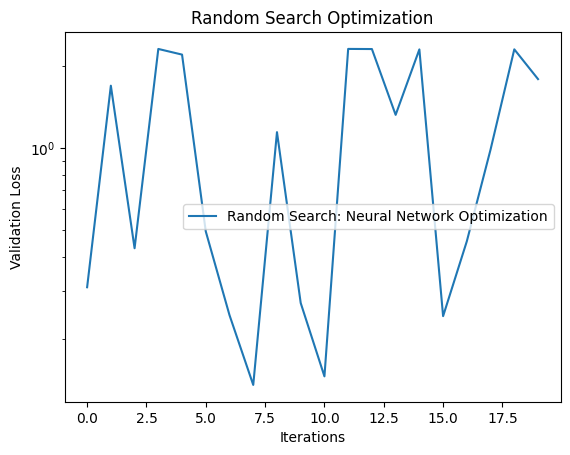

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the objective function
def objective_function(params):
    # Hyperparameters
    learning_rate = params['learning_rate']
    hidden_size = params['hidden_size']
    batch_size = params['batch_size']

    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    val_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model, loss, and optimizer
    input_size = 28 * 28  # MNIST images are 28x28
    num_classes = 10       # 10 digits
    model = SimpleNN(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    num_epochs = 5  # Keep it short for demonstration
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images = images.reshape(-1, input_size)  # Flatten the images
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate on the validation set
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()

    # Return the average validation loss
    return val_loss / len(val_loader)

# Define the Optimizer class (provided by your teacher)
class Optimizer:
    def __init__(self, task):
        self.objective_function_history = []
        self.best_solution = None
        self.best_objective_function = np.inf
        self.task_name = task['name']
        self.fitness_function = task['func']
        self.bounds = task['bounds']
        self.budget = task['budget']
        self.solver_name = 'Undefined'
        self.elapsed_time = 'Undefined'

    def run_minimize(self):
        start_time = time.time()
        self.minimize()
        end_time = time.time()
        self.elapsed_time = end_time - start_time

    def minimize(self):
        raise NotImplementedError("This method should be implemented by subclasses")

    def print_results(self):
        print(f'Task: {self.task_name}')
        print('Best objective function:', self.best_objective_function)
        print('Found solution:', self.best_solution)
        print(f'Elapsed time: {self.elapsed_time} sec')

    def make_plot(self):
        plt.semilogy(self.objective_function_history, label=self.solver_name + ': '+self.task_name)

# Implement Random Search
class RandomSearch(Optimizer):
    def __init__(self, task):
        super().__init__(task)
        self.solver_name = 'Random Search'

    def minimize(self):
        for _ in range(self.budget):
            # Randomly sample hyperparameters within bounds
            params = {
                'learning_rate': np.random.uniform(self.bounds['learning_rate'][0], self.bounds['learning_rate'][1]),
                'hidden_size': np.random.randint(self.bounds['hidden_size'][0], self.bounds['hidden_size'][1]),
                'batch_size': np.random.randint(self.bounds['batch_size'][0], self.bounds['batch_size'][1]),
            }

            # Evaluate the objective function
            objective_value = self.fitness_function(params)

            # Update the best solution
            if objective_value < self.best_objective_function:
                self.best_objective_function = objective_value
                self.best_solution = params

            # Store the history
            self.objective_function_history.append(objective_value)

# Define the task
task = {
    'name': 'Neural Network Optimization',
    'func': objective_function,
    'bounds': {
        'learning_rate': (0.0001, 0.1),  # Learning rate range
        'hidden_size': (32, 256),         # Hidden layer size range
        'batch_size': (32, 256),          # Batch size range
    },
    'budget': 20  # Number of evaluations
}




# Run Random Search
optimizer = RandomSearch(task)
optimizer.run_minimize()

# Print results
optimizer.print_results()

# Plot the history of objective function values
optimizer.make_plot()
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Random Search Optimization')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the objective function
def objective_function(params):
    # Hyperparameters
    learning_rate = params['learning_rate']
    hidden_size = params['hidden_size']
    batch_size = params['batch_size']

    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    val_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model, loss, and optimizer
    input_size = 28 * 28  # MNIST images are 28x28
    num_classes = 10       # 10 digits
    model = SimpleNN(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    num_epochs = 5  # Keep it short for demonstration
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            images = images.reshape(-1, input_size)  # Flatten the images
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluate on the validation set
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.reshape(-1, input_size)
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()

    # Return the average validation loss
    return val_loss / len(val_loader)

# Define the Optimizer class (provided by your teacher)
class Optimizer:
    def __init__(self, task):
        self.objective_function_history = []
        self.best_solution = None
        self.best_objective_function = np.inf
        self.task_name = task['name']
        self.fitness_function = task['func']
        self.bounds = task['bounds']
        self.budget = task['budget']
        self.solver_name = 'Undefined'
        self.elapsed_time = 'Undefined'

    def run_minimize(self):
        start_time = time.time()
        self.minimize()
        end_time = time.time()
        self.elapsed_time = end_time - start_time

    def minimize(self):
        raise NotImplementedError("This method should be implemented by subclasses")

    def print_results(self):
        print(f'Task: {self.task_name}')
        print('Best objective function:', self.best_objective_function)
        print('Found solution:', self.best_solution)
        print(f'Elapsed time: {self.elapsed_time} sec')

    def make_plot(self):
        plt.semilogy(self.objective_function_history, label=self.solver_name + ': '+self.task_name)

# Implement Random Search
class RandomSearch(Optimizer):
    def __init__(self, task):
        super().__init__(task)
        self.solver_name = 'Random Search'

    def minimize(self):
        for _ in range(self.budget):
            # Randomly sample hyperparameters within bounds
            params = {
                'learning_rate': np.random.uniform(self.bounds['learning_rate'][0], self.bounds['learning_rate'][1]),
                'hidden_size': np.random.randint(self.bounds['hidden_size'][0], self.bounds['hidden_size'][1]),
                'batch_size': np.random.randint(self.bounds['batch_size'][0], self.bounds['batch_size'][1]),
            }

            # Evaluate the objective function
            objective_value = self.fitness_function(params)

            # Update the best solution
            if objective_value < self.best_objective_function:
                self.best_objective_function = objective_value
                self.best_solution = params

            # Store the history
            self.objective_function_history.append(objective_value)

# Define the task
# task = {
#     'name': 'Neural Network Optimization',
#     'func': objective_function,
#     'bounds': {
#         'learning_rate': (0.0001, 0.1),  # Learning rate range
#         'hidden_size': (32, 256),         # Hidden layer size range
#         'batch_size': (32, 256),          # Batch size range
#     },
#     'budget': 20  # Number of evaluations
# }

#  for different task ``Modify the bounds in the task dictionary to explore different ranges for hyperparameters.``

task = {
    'name': 'Neural Network Optimization',
    'func': objective_function,
    'bounds': {
            'learning_rate': (0.001, 0.01),
          'hidden_size': (64, 512),
          'batch_size': (64, 128),
    },
    'budget': 50  # Number of evaluations
}




# Run Random Search
optimizer = RandomSearch(task)
optimizer.run_minimize()

# Print results
optimizer.print_results()

# Plot the history of objective function values
optimizer.make_plot()
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.title('Random Search Optimization')
plt.legend()
plt.show()